# Loading Original Data

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
import gc

In [ ]:
original_x = pd.read_csv("./data/train_x.csv", delimiter=",", header = None) # load from text 

In [ ]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)

In [ ]:
#have to reformat from data frame 

original_x = original_x.values

In [ ]:
y = (y.values).ravel()

In [ ]:
original_x = original_x.astype(np.float32)

In [ ]:
#visualizing a random 5 images

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(original_x[20:25], y[20:25])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

### Processing the data

In [ ]:
#this will make any 'dark' pixel black and any 'light' pixel white
#basically will make the background black and the digits white

def binarize_element(x, threshold = 250):
    #make this less than to get black digits and white background
    if x > threshold:
        x = 255
        return x
    else:
        x = 0
        return x

In [ ]:
def array_map(x):
    return map(binarize_element, x)

In [ ]:
#making the data black and white

new_x = np.zeros((original_x.shape[0], original_x.shape[1]))
for i in range(len(new_x)):
    new_x[i] = list(array_map(original_x[i]))

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(new_x[20:25], y[20:25])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
import pandas as pd 
df = pd.DataFrame(new_x)

In [ ]:
#writing the black and white images to a file

df.to_csv("./data/bw_x.csv", header = False, index = False)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
import gc

In [2]:
#going to be doing more preprocessing on the black and white images

x = pd.read_csv("./data/bw_x.csv", delimiter=",", header = None) # load from processed images

In [3]:
x = x.values

In [4]:
x = x.astype(np.float32)

In [5]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)
y = (y.values).ravel()

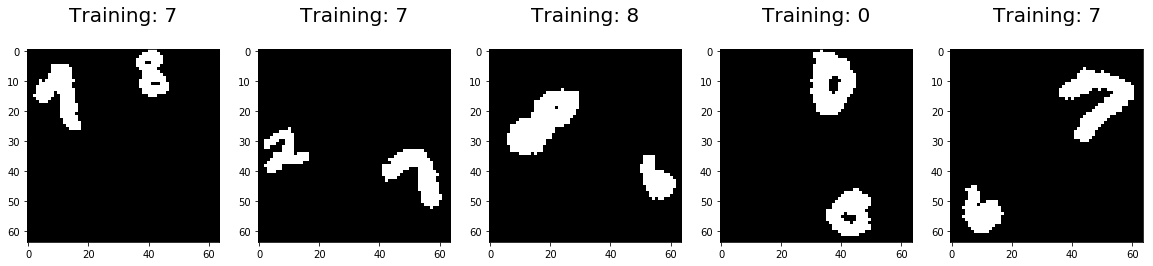

In [129]:
#making sure the background is indeed black and the digits are white

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[5:10], y[5:10])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

### Perfecting getting the largest digit

In [8]:
from scipy import ndimage
from skimage.transform import resize
import cv2

In [130]:
print(x[5, 10:50])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. 255. 255. 255.   0.   0.   0.   0.   0.   0.   0.]


In [186]:
new_x = np.zeros((x.shape[0], x.shape[1]))

In [187]:
for i in range(len(new_x)):
    im = np.reshape(x[i], (64,64))
    # Label objects
    labeled_image, num_features = ndimage.label(im)
    # Find the location of all objects
    objs = ndimage.find_objects(labeled_image)
    # Get the height and width
    measurements = []
    for ob in objs:
        measurements.append((int(ob[0].stop - ob[0].start), int(ob[1].stop - ob[1].start)))

    index = max(enumerate(measurements), key=lambda x: max(x[1]))[0]

    min_y, max_y = objs[index][0].start, objs[index][0].stop
    min_x, max_x = objs[index][1].start, objs[index][1].stop

    if(min_y > 1):
        min_y -= 2
    if(max_y < 63):
        max_y += 2
    if(min_x > 1):
        min_x -= 2
    if(max_x < 63):
        max_x += 2

    image = im[min_y:max_y,min_x:max_x]
    image = image.astype(np.uint32)
    h,w = image.shape
    img = resize(image, (64, 64), preserve_range=True, mode =  'reflect')
    
    #kernel = np.ones((5,5),np.float32)/25
    #dst = cv2.filter2D(img,-1,kernel)
    #img = cv2.GaussianBlur(img,(5,5),0)

    new_x[i] = img.reshape(4096)
    

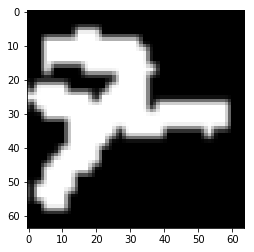

In [188]:
plt.imshow(np.reshape(new_x[4940], (64,64)), cmap = 'gray')

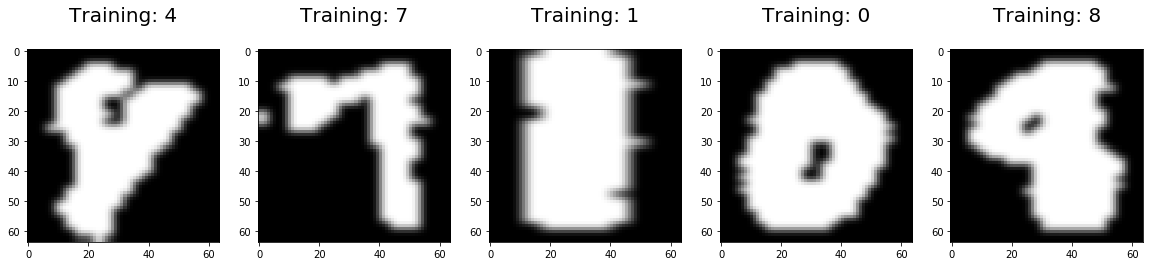

In [83]:
#making sure the background is indeed black and the digits are white

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(new_x[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

Comparing the original images, the black and white, and the fully processed

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(original_x[3140:3145], y[3140:3145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[3140:3145], y[3140:3145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(new_x[3140:3145], y[3140:3145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [189]:
#better to make the digits black and the background white

def invert_element(x):
    if x != 0:
        x = 0
        return x
    else:
        x = 255
        return x

In [190]:
def invert_map(x):
    return map(invert_element, x)

In [191]:
processed_x = np.zeros((new_x.shape[0],new_x.shape[1]))
for i in range(len(processed_x)):
    processed_x[i] = list(invert_map(new_x[i]))

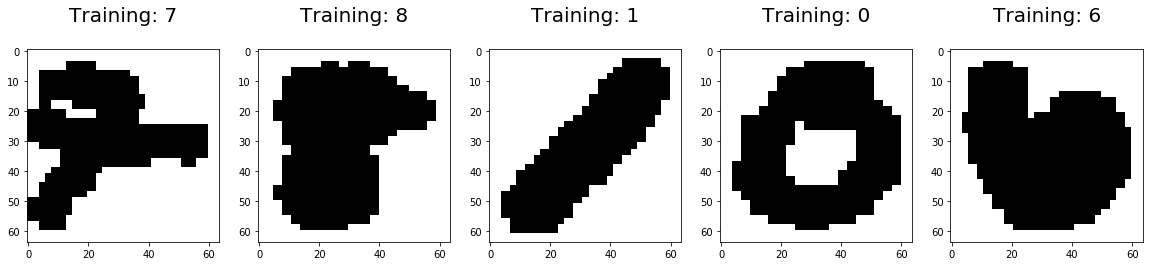

In [192]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(processed_x[4940:4945], y[4940:4945])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [194]:
import pandas as pd 
df = pd.DataFrame(processed_x)

In [195]:
df.to_csv("./data/processed_x.csv", header = False, index = False)

# Can start from here

In [1]:
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
import gc

In [2]:
x = pd.read_csv("./data/processed_x.csv", delimiter=",", header = None) # load from processed images

In [3]:
x = x.values

In [4]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)
y = (y.values).ravel()

In [5]:
x = x.astype(np.float32)
x /= 255

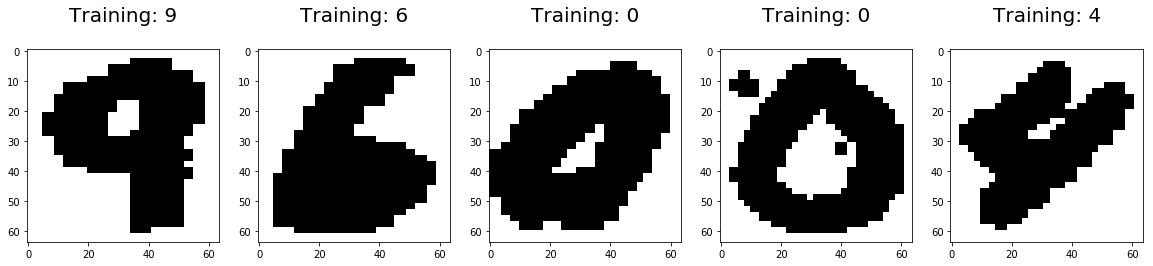

In [19]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[4140:4145], y[4140:4145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

## Logistic Regression with Processed Data

In [ ]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
#this is splitting the non-processed images

np.random.seed(100)
from sklearn.model_selection import train_test_split
og_train_x, og_valid_x, og_train_y, og_valid_y = train_test_split(
    original_x, y, test_size=1/10.0, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

#this solver is faster according to sklearn documentation, not the default
clf = LogisticRegression(solver = 'lbfgs')

In [ ]:
#training logistic regression on original dataset

clf.fit(og_train_x, og_train_y)

In [ ]:
#predict on validation
og_predictions = clf.predict(og_valid_x)

In [ ]:
og_corr = 0

for i, pred in enumerate(og_predictions):
    if pred == og_valid_y[i]:
        og_corr += 1

og_acc = og_corr/len(og_valid_y)
print("Accuracy: " + str(og_acc))

In [8]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
#this is splitting the processed data

np.random.seed(100)
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [10]:
logisticRegr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
#predict on validation
predictions = logisticRegr.predict(valid_x)

In [12]:
corr = 0

for i, pred in enumerate(predictions):
    if pred == valid_y[i]:
        corr += 1

acc = corr/len(valid_y)
print("Accuracy: " + str(acc))

Accuracy: 0.7386


Preprocessing led to a ~7% increase in accuracy (training and validation sets were identical between the two different trainings)

In [15]:
#getting all of the misclassified instances

index = 0
misclassifiedIndexes = []
for label, predict in zip(valid_y, predictions):
    if label == predict: 
        misclassifiedIndexes.append(index)
    index +=1

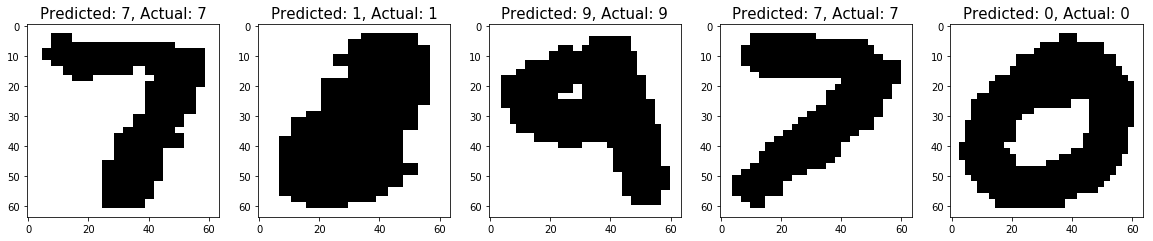

In [18]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[100:105]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(valid_x[badIndex], (64,64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], valid_y[badIndex]), fontsize = 15)

# Preprocessing Test Data

In [ ]:
test_x = pd.read_csv("./data/train_x.csv", delimiter=",", header = None) # load from text 